Process:

1. Join 'ImdbTitleBasics.csv' with 'ImdbTitleCrew.csv' and save it as 'ImdbTitleBasicsWithCrew.csv'

2. Start EDA 

In [4]:
import pandas as pd

# Define data types for columns in ImdbTitleBasics
data_types_basics = {
    'tconst': str,
    'titleType': str,
    'primaryTitle': str,
    'originalTitle': str,
    'isAdult': int,
    'startYear': str,
    'endYear': str,
    'runtimeMinutes': str,
    'genres': str
}

# Define data types for columns in ImdbTitleCrew
data_types_crew = {
    'tconst': str,
    'directors': str,
    'writers': str
}

# Load ImdbTitleBasics and ImdbTitleCrew data with specified data types
imdb_title_basics = pd.read_csv('ImdbTitleBasics.csv', dtype=data_types_basics, low_memory=False)
imdb_title_crew = pd.read_csv('ImdbTitleCrew.csv', dtype=data_types_crew, low_memory=False)

# Merge ImdbTitleBasics with ImdbTitleCrew on 'tconst' using a right join
merged_data = pd.merge(imdb_title_basics, imdb_title_crew[['tconst', 'directors', 'writers']], on='tconst', how='right')

# Reordering columns
columns_order = ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'directors', 'writers']
merged_data = merged_data[columns_order]

# Display the merged data
print(merged_data.head())

# Save the merged data to a new CSV file
merged_data.to_csv('ImdbTitleBasicsWithCrew.csv', index=False)


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  \
0        0      1894      \N              1         Documentary,Short   
1        0      1892      \N              5           Animation,Short   
2        0      1892      \N              4  Animation,Comedy,Romance   
3        0      1892      \N             12           Animation,Short   
4        0      1893      \N              1              Comedy,Short   

   directors writers  
0  nm0005690      \N  
1  nm0721526      \N  
2  nm0721526      \N  
3  nm0721526      \N  
4

Now, start the EDA Process

In [7]:
# Define the data types for each column to resolve the mixed types warning
data_types = {
    'tconst': str,
    'titleType': str,
    'primaryTitle': str,
    'originalTitle': str,
    'isAdult': int,
    'startYear': object,  # Assuming it might have mixed types
    'endYear': object,    # Depending on the data, it might have mixed types as well
    'runtimeMinutes': object,  # Might have mixed types too
    'genres': str,
    'directors': str,
    'writers': str
}

# Read the CSV file with specified data types to handle mixed types warning
data = pd.read_csv('ImdbTitleBasicsWithCrew.csv', dtype=data_types)

# Display the first few rows of the dataset to verify the data types
print(data.head())


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  \
0        0      1894      \N              1         Documentary,Short   
1        0      1892      \N              5           Animation,Short   
2        0      1892      \N              4  Animation,Comedy,Romance   
3        0      1892      \N             12           Animation,Short   
4        0      1893      \N              1              Comedy,Short   

   directors writers  
0  nm0005690      \N  
1  nm0721526      \N  
2  nm0721526      \N  
3  nm0721526      \N  
4

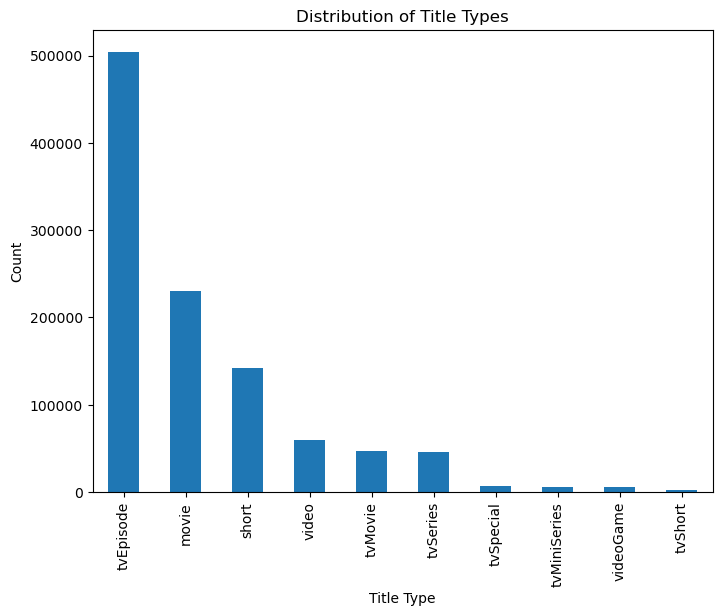

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting histograms for 'titleType'
plt.figure(figsize=(8, 6))
data['titleType'].value_counts().plot(kind='bar')
plt.title('Distribution of Title Types')
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.show()

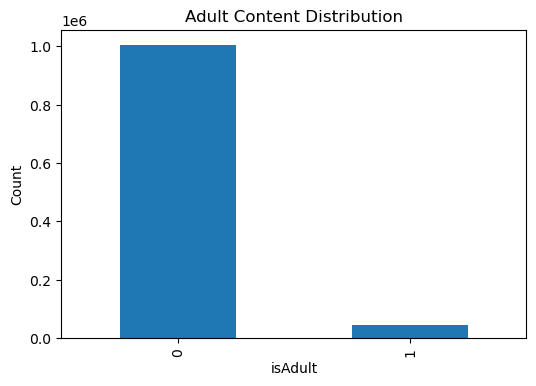

In [11]:
# Plotting histogram for 'isAdult'
plt.figure(figsize=(6, 4))
data['isAdult'].value_counts().plot(kind='bar')
plt.title('Adult Content Distribution')
plt.xlabel('isAdult')
plt.ylabel('Count')
plt.show()


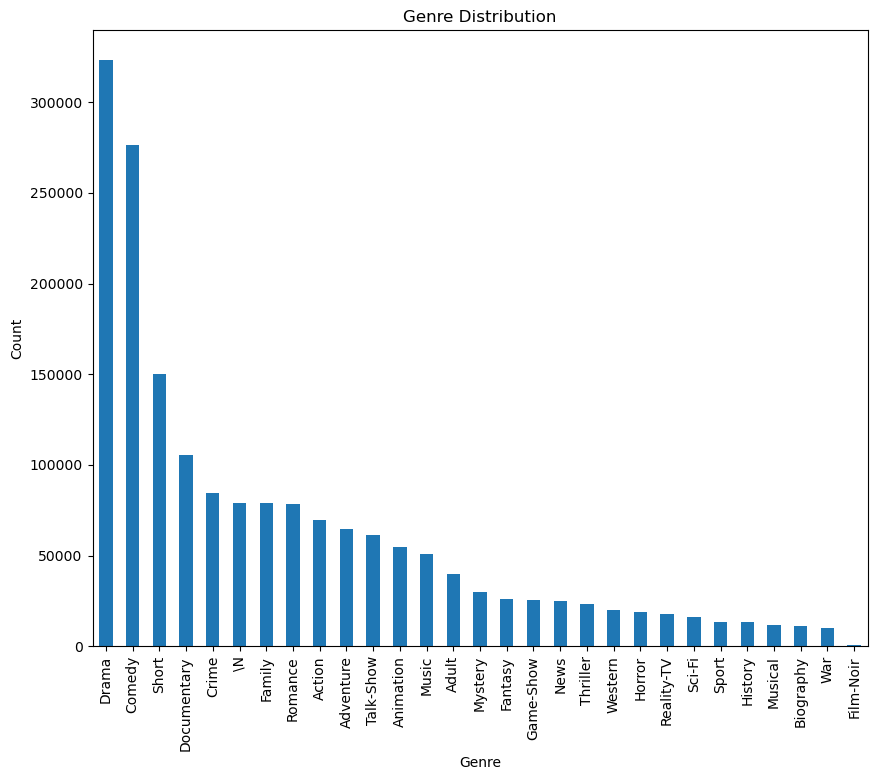

In [12]:
# Plotting histogram for 'genres'
# Note: Assuming genres are comma-separated values in a single column
genres = data['genres'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(10, 8))
genres.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

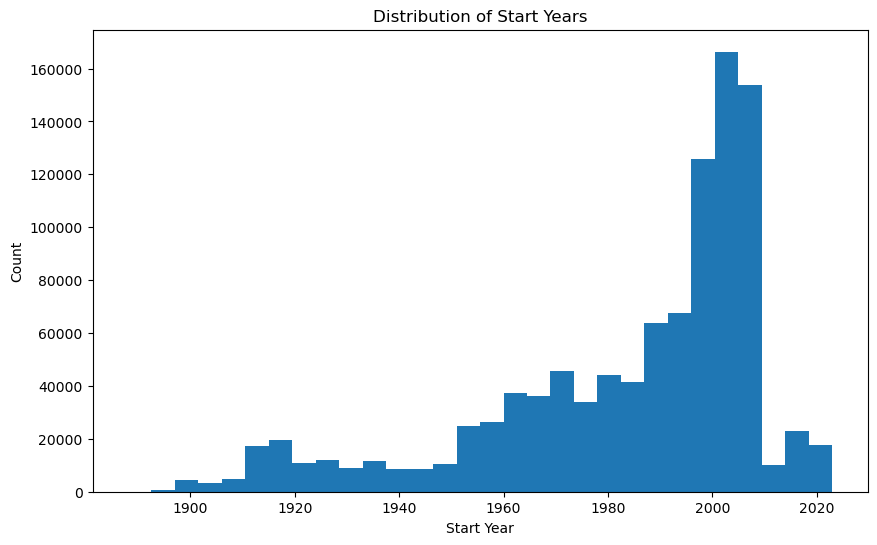

In [15]:
# Filtering out rows with valid startYear values (excluding \N values)
valid_start_years = data[data['startYear'] != r'\N'].copy()
valid_start_years['startYear'] = valid_start_years['startYear'].astype(int)

# Plotting a histogram for 'startYear'
plt.figure(figsize=(10, 6))
valid_start_years['startYear'].plot(kind='hist', bins=30)
plt.title('Distribution of Start Years')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.show()
